<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Ajuste de curvas </font> </center>




<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting


## 0. Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(0,1)$ y $(1,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(-1,1)$, $(0,0)$ y $(1,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_1(1) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 0 \\ 1 & 1\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-\beta_1=1$.

In [1]:
# Importar numpy y el matplotlib.pyplot
import numpy as np
from matplotlib import pyplot as plt

In [2]:
help(np.linalg.solve)

Help on function solve in module numpy.linalg:

solve(a, b)
    Solve a linear matrix equation, or system of linear scalar equations.
    
    Computes the "exact" solution, `x`, of the well-determined, i.e., full
    rank, linear matrix equation `ax = b`.
    
    Parameters
    ----------
    a : (..., M, M) array_like
        Coefficient matrix.
    b : {(..., M,), (..., M, K)}, array_like
        Ordinate or "dependent variable" values.
    
    Returns
    -------
    x : {(..., M,), (..., M, K)} ndarray
        Solution to the system a x = b.  Returned shape is identical to `b`.
    
    Raises
    ------
    LinAlgError
        If `a` is singular or not square.
    
    Notes
    -----
    
    .. versionadded:: 1.8.0
    
    Broadcasting rules apply, see the `numpy.linalg` documentation for
    details.
    
    The solutions are computed using LAPACK routine ``_gesv``.
    
    `a` must be square and of full-rank, i.e., all rows (or, equivalently,
    columns) must be linearl

In [3]:
# Encontrar beta_0 y beta_1 resolviendo el sistema
A = np.array([[1,0],
              [1,1]])
b = np.array([1,0])
# A*Beta = b
#A^-1*A*Beta = A^-1 * b 
#I_2*Beta = A^-1 * b 

In [4]:
# Beta = A^-1 * b
Beta = np.linalg.inv(A).dot(b)
Beta

array([ 1., -1.])

In [5]:
np.dot(np.linalg.inv(A),b)

array([ 1., -1.])

In [6]:
Beta[0], Beta[1]

(1.0, -1.0)

$$ y=1  -x $$

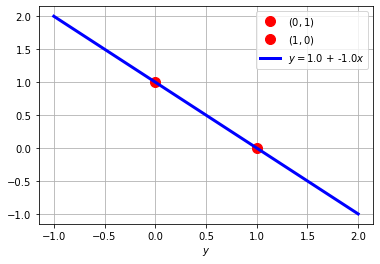

In [7]:
# Graficar la recta encontrada junto con los puntos
plt.figure(figsize=(6,4))
plt.plot(0,1,'ro',ms=10, label='$(0,1)$')
plt.plot(1,0,'ro',ms=10, label='$(1,0)$')

x_num = np.linspace(-1,2)
y_num = Beta[0] + Beta[1]*x_num

plt.plot(x_num,y_num, 'b', lw=3, label=f'$y=${np.round(Beta[0],2)} + {np.round(Beta[1],2)}$x$')
plt.xlabel('$x$')
plt.xlabel('$y$')
plt.legend(loc='best')
plt.grid()

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(-1,1)$, obtenemos $\beta_2(-1)^2 + \beta_1(-1) + \beta_0 = 1$. Ahora, evaluando en el punto $(0,0)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 0$. Finalmente, evaluando en el punto $(1,1)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & -1 & 1 \\ 1 & 0 & 0 \\ 1 & 1 & 1 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=\beta_1=0$ y $\beta_2=1$.

In [8]:
# Encontrar beta_0, beta_1 y beta_2
A = np.array([[1,-1,1],
              [1,0,0],
              [1,1,1]])
b=np.array([1,0,1])



In [9]:
help(np.linalg.solve)

Help on function solve in module numpy.linalg:

solve(a, b)
    Solve a linear matrix equation, or system of linear scalar equations.
    
    Computes the "exact" solution, `x`, of the well-determined, i.e., full
    rank, linear matrix equation `ax = b`.
    
    Parameters
    ----------
    a : (..., M, M) array_like
        Coefficient matrix.
    b : {(..., M,), (..., M, K)}, array_like
        Ordinate or "dependent variable" values.
    
    Returns
    -------
    x : {(..., M,), (..., M, K)} ndarray
        Solution to the system a x = b.  Returned shape is identical to `b`.
    
    Raises
    ------
    LinAlgError
        If `a` is singular or not square.
    
    Notes
    -----
    
    .. versionadded:: 1.8.0
    
    Broadcasting rules apply, see the `numpy.linalg` documentation for
    details.
    
    The solutions are computed using LAPACK routine ``_gesv``.
    
    `a` must be square and of full-rank, i.e., all rows (or, equivalently,
    columns) must be linearl

In [10]:
#Método de solucion de ecuaciones (como entrada se necesitan matrices y vectores)
Beta = np.linalg.inv(A).dot(b)
Beta

array([0., 0., 1.])

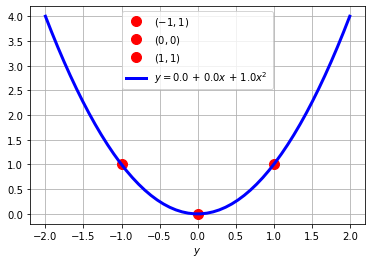

In [11]:
# Graficar la parabola junto con los puntos
plt.figure(figsize=(6,4))
plt.plot(-1,1,'ro',ms=10, label='$(-1,1)$')
plt.plot(0,0,'ro',ms=10, label='$(0,0)$')
plt.plot(1,1,'ro',ms=10, label='$(1,1)$')

x_num = np.linspace(-2,2)
y_num = Beta[0] + Beta[1]*x_num + Beta[2]*x_num**2

plt.plot(x_num,y_num, 'b', lw=3, label=f'$y=${np.round(Beta[0],2)} + {np.round(Beta[1],2)}$x$ + {np.round(Beta[2],2)}$x^2$ ')
plt.xlabel('$x$')
plt.xlabel('$y$')
plt.legend(loc='best')
plt.grid()

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de '*bonitos*' en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

In [12]:
# Crear un conjunto de puntos ruidosos a partir de una recta
N=100
x=np.linspace(0,10,N)
y = 10 +2*x+np.random.normal(loc=0, scale=2, size=(N,))

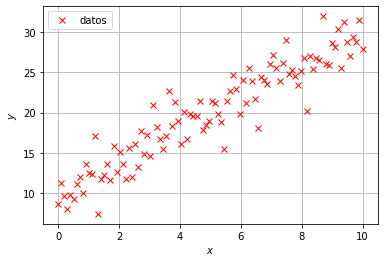

In [13]:
# Graficar
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr',label='datos')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### ¿Cómo ajustamos una curva a esto?

## 1. Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$, de forma que la función evaluada en los puntos $x_i$ ($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\frac{1}{2n}\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\frac{1}{2n}\sum_{i=1}^{n}(y_i-(\beta_0+ \beta_1x_i))^2=\frac{1}{2n}\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\frac{1}{2n}\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1\quad\dots\quad y_n\right]^T$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

Notar que el problema anterior no es de programación lineal, ¿porqué?

Para llevar a cabo la anterior minimización, la librería `SciPy` en su módulo `optimize` contiene la función `minimize`.

In [14]:
# Importar el módulo optimize de la librería scipy
from scipy import optimize as opt

In [15]:
help(opt.optimize)

Help on module scipy.optimize.optimize in scipy.optimize:

NAME
    scipy.optimize.optimize

DESCRIPTION
    #__docformat__ = "restructuredtext en"
    # ******NOTICE***************
    # optimize.py module by Travis E. Oliphant
    #
    # You may copy and use this module as you see fit with no
    # guarantee implied provided you keep this notice in all copies.
    # *****END NOTICE************

CLASSES
    builtins.UserWarning(builtins.Warning)
        OptimizeWarning
    builtins.dict(builtins.object)
        OptimizeResult
    
    class OptimizeResult(builtins.dict)
     |  Represents the optimization result.
     |  
     |  Attributes
     |  ----------
     |  x : ndarray
     |      The solution of the optimization.
     |  success : bool
     |      Whether or not the optimizer exited successfully.
     |  status : int
     |      Termination status of the optimizer. Its value depends on the
     |      underlying solver. Refer to `message` for details.
     |  message : str

Parámetros importantes:
- fun: función $f(x)$, se debe definir antes de llamar minimize, como `def f(x): ... return ...`
- x0: valor inicial. En una función no lineal, en general, hay múltiples mínimos. Dependiendo de la semilla caerá en uno de esos mínimos. Se ingresa como $x0 = \text{np.array}([x_{01},\dots,x_{0n}])$.
- bounds: como en linprog.
- constraints: funciones que definen las restricciones $g_i(x)$ y $h_j(x)$. Se definen igual que $f(x)$ y se ingresan como {'ineq': g_i, 'eq': h_j}.

Primero debemos construir la función objetivo y la semilla inicial:

In [16]:
x

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [17]:
y

array([ 8.69197004, 11.2431508 ,  9.70401987,  8.05522307,  9.80187781,
        9.37502924, 11.14083474, 12.06489843, 10.00153953, 13.59837252,
       12.52696599, 12.36224139, 17.06918603,  7.4738128 , 11.77224074,
       12.27844584, 13.62817867, 11.69219769, 15.92953774, 12.68490183,
       15.15365192, 13.63541992, 11.76007252, 15.58288163, 12.09605004,
       16.12389985, 13.23520753, 17.72973736, 14.89358861, 17.27341845,
       14.59439486, 20.96953412, 18.17963349, 16.7377853 , 15.4953602 ,
       17.11353707, 22.71655635, 18.33240332, 21.30403133, 18.95441261,
       16.08038815, 20.12594208, 16.70198136, 19.86204716, 19.53986481,
       19.58139481, 21.38586083, 17.89882491, 18.50843506, 19.00845604,
       21.46722687, 21.15236999, 19.82455229, 18.84598056, 15.50516147,
       21.45578208, 22.70039733, 24.6616084 , 22.89310473, 19.84777986,
       23.99081269, 21.22044116, 25.52143836, 23.93837796, 21.74658308,
       18.07348207, 24.46121972, 24.00264974, 23.56257763, 26.03

In [18]:
# Definir funcion objetivo y punto inicial
def min_sqe(beta,x_points,y_points):
    n = len(x_points)
    f_hat = beta[0] + beta[1]*x_points
    sqe = (1/(2*n))*((y_points - f_hat)**2).sum()
    
    return sqe

In [19]:
beta_ini = [0,0]

In [20]:
solucion = opt.minimize(fun = min_sqe, x0=beta_ini, args=(x,y))
solucion

      fun: 2.214177565742852
 hess_inv: array([[ 3.93952235, -0.58742375],
       [-0.58742375,  0.1170162 ]])
      jac: array([-8.94069672e-08, -2.98023224e-07])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 9
     njev: 10
   status: 0
  success: True
        x: array([10.03146157,  1.99490893])

In [21]:
Beta = solucion.x
Beta

array([10.03146157,  1.99490893])

$$\hat{f(x)}=9.67 + 2.06*x$$

¿Qué tan bien luce el ajuste?

In [22]:
# Coeficientes \beta_0 y \beta_1


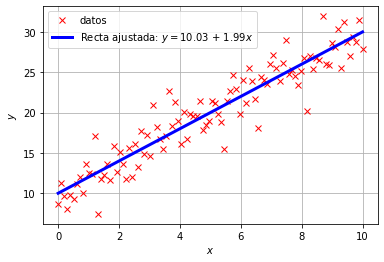

In [23]:
# Grafica de los puntos y la recta ajustada
# Graficar
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr',label='datos')
f_hat = Beta[0] + Beta[1]*x

plt.plot(x,f_hat,'b', lw=3, label=f'Recta ajustada: $y=${np.round(Beta[0],2)} + {np.round(Beta[1],2)}$x$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

Note que la pendiente es aproximadamente $2$ y el intercepto es aproximadamente $10$.

La anterior idea se puede extender a ajuste polinomial...

## 2. Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

In [24]:
# Generamos 100 puntos ruidosos a partir de una senoidal
N=100
x=np.linspace(0,1,N)
y = np.sin(2*np.pi*x) + np.random.normal(loc=0,scale=0.3, size=(N,))


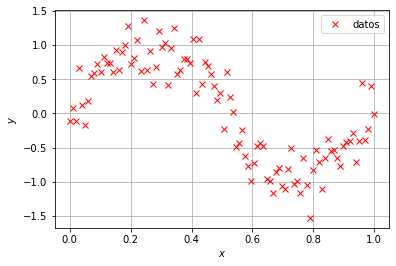

In [25]:
# Graficar

plt.figure(figsize=(6,4))
plt.plot(x,y,'xr',label='datos')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### 2.1. ¿Se ajustará bien una recta?

In [26]:
def min_sqe_1(beta,x_points,y_points):
    n = len(x_points)
    f_hat = beta[0] + beta[1]*x_points
    sqe = (1/(2*n))*((y_points - f_hat)**2).sum()
    
    return sqe
beta_ini_1=[0,0]

In [27]:
# Resolver
solucion_1 = opt.minimize(fun=min_sqe_1, x0=beta_ini_1, args=(x,y))
Beta_1=solucion_1.x
Beta_1

array([ 0.91034675, -1.73248293])

In [61]:
solucion_1

      fun: 0.14274332532213563
 hess_inv: array([[ 3.91108197, -5.79510694],
       [-5.79510694, 11.51129396]])
      jac: array([-9.37655568e-06, -9.76026058e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([ 0.91034675, -1.73248293])

**Veamos $\beta$ para el ajuste con recta**

In [28]:
Beta_1

array([ 0.91034675, -1.73248293])

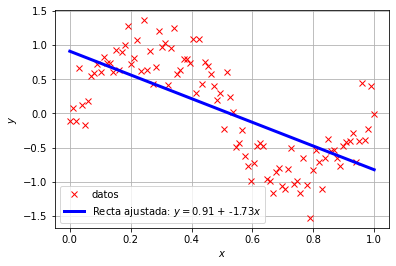

In [29]:
# Grafica de los puntos y la recta ajustada
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr',label='datos')
f_hat_1 = Beta_1[0] + Beta_1[1]*x

plt.plot(x,f_hat_1,'b', lw=3, label=f'Recta ajustada: $y=${np.round(Beta_1[0],2)} + {np.round(Beta_1[1],2)}$x$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### 2.2. La recta no es buen ajuste... ¿Se ajustará bien una parabola?

In [30]:
# Definir funcion objetivo y semilla
def min_sqe_2(beta,x_points,y_points):
    n = len(x_points)
    #modelo polinomial de grado 2
    f_hat = beta[0] + beta[1]*x_points + beta[2]*x_points**2
    
    sqe = (1/(2*n))*((y_points - f_hat)**2).sum()
    
    return sqe

beta_ini_2=[0,0,0]

In [31]:
# Resolver
solucion_2 = opt.minimize(fun=min_sqe_2, x0=beta_ini_2,args=(x,y))
solucion_2

      fun: 0.14257990404595183
 hess_inv: array([[   8.58973276,  -34.41301756,   28.60204474],
       [ -34.41301756,  184.61731316, -173.02200485],
       [  28.60204474, -173.02200485,  172.93830309]])
      jac: array([-2.31899321e-06, -1.35228038e-06, -9.64850187e-07])
  message: 'Optimization terminated successfully.'
     nfev: 95
      nit: 18
     njev: 19
   status: 0
  success: True
        x: array([ 0.8710947 , -1.49464122, -0.23778431])

**Veamos $\beta$ para el ajuste con parábola**

In [32]:
# Mostrar coeficientes
Beta_2 = solucion_2.x
Beta_2

array([ 0.8710947 , -1.49464122, -0.23778431])

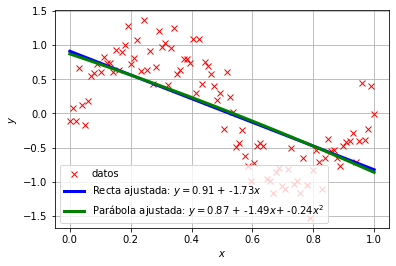

In [33]:
# Graficar recta y parabola ajustadas
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr',label='datos')
f_hat_1 = Beta_1[0] + Beta_1[1]*x
f_hat_2 = Beta_2[0] + Beta_2[1]*x + Beta_2[2]*x**2

plt.plot(x,f_hat_1,'b', lw=3, label=f'Recta ajustada: $y=${np.round(Beta_1[0],2)} + {np.round(Beta_1[1],2)}$x$')
plt.plot(x,f_hat_2,'g', lw=3, label=f'Parábola ajustada: $y=${np.round(Beta_2[0],2)} + {np.round(Beta_2[1],2)}$x$+ {np.round(Beta_2[2],2)}$x^2$')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### 2.3. Tampoco. Quizá un polinomio cúbico...

In [53]:
# Definir funcion objetivo y semilla
def min_sq_3(beta, x_points, y_points):
    n=len(x_points)
    f_hat_3 = beta[0] + beta[1]*x_points + beta[2]*x_points**2 + beta[3]*x_points**3
    return (1/(2*n))*((y_points - f_hat_3)**2).sum()

In [54]:
beta_ini_3 = [0,0,0,0]


In [55]:
solucion_3 = opt.minimize(fun=min_sq_3, x0=beta_ini_3, args=(x, y))

**Veamos $\beta$ para el ajuste con cúbica**

In [56]:
# Mostrar coeficientes
solucion_3

      fun: 0.03899438251216909
 hess_inv: array([[   14.51610313,  -109.8518286 ,   220.7547024 ,  -129.08141266],
       [ -109.8518286 ,  1121.4403118 , -2537.54885557,  1580.62785944],
       [  220.7547024 , -2537.54885557,  6111.52163074, -3958.13990017],
       [ -129.08141266,  1580.62785944, -3958.13990017,  2633.35011994]])
      jac: array([7.38957897e-06, 3.09664756e-06, 2.88197771e-06, 2.88803130e-06])
  message: 'Optimization terminated successfully.'
     nfev: 192
      nit: 31
     njev: 32
   status: 0
  success: True
        x: array([ -0.26297058,  12.46639866, -35.31662804,  23.38601069])

In [58]:
# Graficar recta, parabola y cubica
Beta_3 = solucion_3.x
Beta_3

array([ -0.26297058,  12.46639866, -35.31662804,  23.38601069])

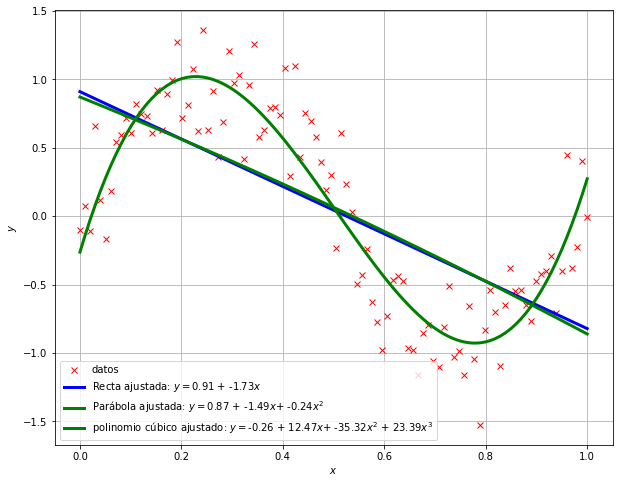

In [60]:
# Graficar recta, parabola y polinomio cúbico ajustados
plt.figure(figsize=(10,8))
plt.plot(x,y,'xr',label='datos')
f_hat_1 = Beta_1[0] + Beta_1[1]*x
f_hat_2 = Beta_2[0] + Beta_2[1]*x + Beta_2[2]*x**2
f_hat_3 = Beta_3[0] + Beta_3[1]*x + Beta_3[2]*x**2 + Beta_3[3]*x**3


plt.plot(x,f_hat_1,'b', lw=3, label=f'Recta ajustada: $y=${np.round(Beta_1[0],2)} + {np.round(Beta_1[1],2)}$x$')
plt.plot(x,f_hat_2,'g', lw=3, label=f'Parábola ajustada: $y=${np.round(Beta_2[0],2)} + {np.round(Beta_2[1],2)}$x$+ {np.round(Beta_2[2],2)}$x^2$')
plt.plot(x,f_hat_3,'g', lw=3, label=f'polinomio cúbico ajustado: $y=${np.round(Beta_3[0],2)} + {np.round(Beta_3[1],2)}$x$+ {np.round(Beta_3[2],2)}$x^2$ + {np.round(Beta_3[3],2)}$x^3$' )

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

Mucho mejor. Entonces, ¿mientras más se suba el orden mejor la aproximación?

### 2.4. Ajustemos un polinomio de grado 7...

In [62]:
# Definimos funcion objetivo y semilla
def min_sq_7(beta,x_points, y_points):
    n=len(x_points)
    f_hat_7 = np.array([beta[i]*x_points**i for i in range(8)]).sum(axis=0)
    
    return (1/(2*n))*((y_points - f_hat_7)**2).sum()

beta_ini_7 = np.zeros(8)

In [63]:
# Resolvemos
solucion_7 = opt.minimize(fun = min_sq_7, x0=beta_ini_7, args=(x,y))

In [64]:
solucion_7

      fun: 0.034289546539326476
 hess_inv: array([[ 2.20817174e+01, -2.79228187e+02,  9.84226740e+02,
        -1.03083642e+03, -3.80715185e+02,  6.55197579e+02,
         6.47636336e+02, -6.20527508e+02],
       [-2.79228187e+02,  5.06309466e+03, -2.10928239e+04,
         2.50426659e+04,  7.89337521e+03, -1.70052121e+04,
        -1.57944769e+04,  1.62465332e+04],
       [ 9.84226740e+02, -2.10928239e+04,  9.68953490e+04,
        -1.24610981e+05, -3.47419129e+04,  8.86054651e+04,
         7.89631916e+04, -8.54818977e+04],
       [-1.03083642e+03,  2.50426659e+04, -1.24610981e+05,
         1.71590408e+05,  4.22205599e+04, -1.27226157e+05,
        -1.09278593e+05,  1.24160169e+05],
       [-3.80715185e+02,  7.89337521e+03, -3.47419129e+04,
         4.22205599e+04,  1.32272922e+04, -2.85900471e+04,
        -2.66010178e+04,  2.70449609e+04],
       [ 6.55197579e+02, -1.70052121e+04,  8.86054651e+04,
        -1.27226157e+05, -2.85900471e+04,  9.69563039e+04,
         8.13054287e+04, -9.548795

**De nuevo, veamos $\beta$**

In [65]:
# Mostrar coeficientes
Beta_7 = solucion_7.x
Beta_7

array([ 4.07146168e-03,  5.65349152e+00,  7.08333298e-01, -3.31500174e+01,
        2.08155750e+00,  3.26792518e+01,  2.22869269e+01, -3.02528807e+01])

**¡Cuidado! OVERFITTING...**

Observar el tamaño de algunos coeficientes. Cuando los coeficientes son grandes, ¿qué pasa?

In [40]:
# Mostrar coeficientes


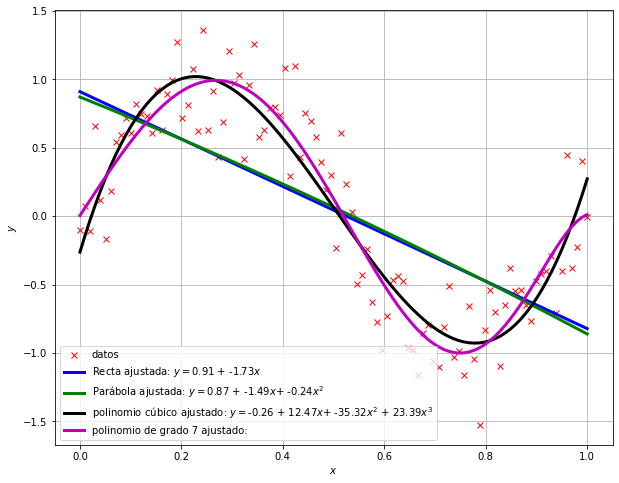

In [69]:
# Grafica de ajustes
# Grafica de los puntos y la recta ajustada

# Graficar recta, parabola y polinomio cúbico ajustados
plt.figure(figsize=(10,8))
plt.plot(x,y,'xr',label='datos')
f_hat_1 = Beta_1[0] + Beta_1[1]*x
f_hat_2 = Beta_2[0] + Beta_2[1]*x + Beta_2[2]*x**2
f_hat_3 = Beta_3[0] + Beta_3[1]*x + Beta_3[2]*x**2 + Beta_3[3]*x**3
f_hat_7 = np.array([Beta_7[i]*x**i for i in range(8)]).sum(axis=0)


plt.plot(x,f_hat_1,'b', lw=3, label=f'Recta ajustada: $y=${np.round(Beta_1[0],2)} + {np.round(Beta_1[1],2)}$x$')
plt.plot(x,f_hat_2,'g', lw=3, label=f'Parábola ajustada: $y=${np.round(Beta_2[0],2)} + {np.round(Beta_2[1],2)}$x$+ {np.round(Beta_2[2],2)}$x^2$')
plt.plot(x,f_hat_3,'k', lw=3, label=f'polinomio cúbico ajustado: $y=${np.round(Beta_3[0],2)} + {np.round(Beta_3[1],2)}$x$+ {np.round(Beta_3[2],2)}$x^2$ + {np.round(Beta_3[3],2)}$x^3$' )
plt.plot(x,f_hat_7,'m', lw=3, label=f'polinomio de grado 7 ajustado:')


plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

Es conveniente ver el error como función del orden del polinomio... **selección de modelos**

In [70]:
# Función objetivo ajuste polinomio grado N
def min_sq_N(beta, x_points, y_points, N):
    n=len(x_points)
    f_hat_N = np.array([beta[i]*x_points**i for i in range(N+1)]).sum(axis=0)
    return (1/(2*n))*((y_points - f_hat_N)**2).sum()

In [71]:
# Error cuadratico
error=[]
for i in range(1,10):
    beta_ini = np.zeros(i+1)
    solucion = opt.minimize(fun=min_sq_N, x0=beta_ini, args=(x,y,i))
    error.append(solucion.fun)

In [72]:
error

[0.14274332532213563,
 0.14257990404595183,
 0.03899438251216909,
 0.038593095747024256,
 0.03502372375813869,
 0.0344745619051269,
 0.034289546539326476,
 0.034341917895867755,
 0.03449856822513492]

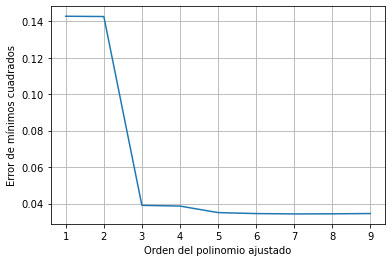

In [73]:
#Plotear la lista de los errores de los ajustes de curvas
plt.figure(figsize=(6,4))
plt.plot(range(1,10), error)
plt.xlabel('Orden del polinomio ajustado')
plt.ylabel('Error de mínimos cuadrados')
plt.grid()
plt.show()

En efecto, parece que con $3$ es suficiente.

### ¿Cómo prevenir el *overfitting* sin importar el orden del modelo?

## 3. Regularización

Vimos que la solución de mínimos cuadrados es:
$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos $\boldsymbol{\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes $\boldsymbol{\beta}$ en el problema de optimización, para que no crezcan tanto. 

### 3.1. Ridge

$$\boldsymbol{\beta}^{ridge} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|^2$$

In [76]:
# Función objetivo ajuste polinomio grado N
def min_sq_N_ridge(beta, x_points, y_points, N, l):
    n=len(x_points)
    f_hat_N = np.array([beta[i]*x_points**i for i in range(N+1)]).sum(axis=0)
    return (1/(2*n))*((y_points - f_hat_N)**2).sum() + l*np.linalg.norm(beta)**2

In [77]:
solucion = opt.minimize(fun=min_sq_N_ridge, x0=np.zeros(8), args=(x,y,7,0.0003))
solucion

      fun: 0.07265875758866605
 hess_inv: array([[ 7.90520653e+00, -3.36203358e+01,  2.50258139e+01,
         1.57643844e+01,  1.73673556e-02, -7.77347431e+00,
        -7.26579166e+00, -9.92650552e-01],
       [-3.36203358e+01,  2.37032711e+02, -2.89526934e+02,
        -1.03066604e+02,  8.14946381e+01,  1.30259072e+02,
         6.29967477e+01, -7.72057303e+01],
       [ 2.50258139e+01, -2.89526934e+02,  5.73281154e+02,
         5.26031081e+01, -3.25187840e+02, -3.36363307e+02,
        -6.62103966e+01,  3.68504373e+02],
       [ 1.57643844e+01, -1.03066604e+02,  5.26031081e+01,
         9.36096013e+01,  6.63999107e+01,  1.27603407e+01,
        -4.87062342e+01, -1.08892777e+02],
       [ 1.73673556e-02,  8.14946381e+01, -3.25187840e+02,
         6.63999107e+01,  2.91481859e+02,  2.39073694e+02,
        -9.25111823e+00, -3.66338288e+02],
       [-7.77347431e+00,  1.30259072e+02, -3.36363307e+02,
         1.27603407e+01,  2.39073694e+02,  2.20838366e+02,
         1.87597781e+01, -2.8578729

In [78]:
Beta_7_ridge = solucion.x
Beta_7_ridge

array([ 0.50145713,  2.16167528, -4.48922054, -3.0404351 , -0.51307175,
        1.27895828,  2.16396568,  2.35225679])

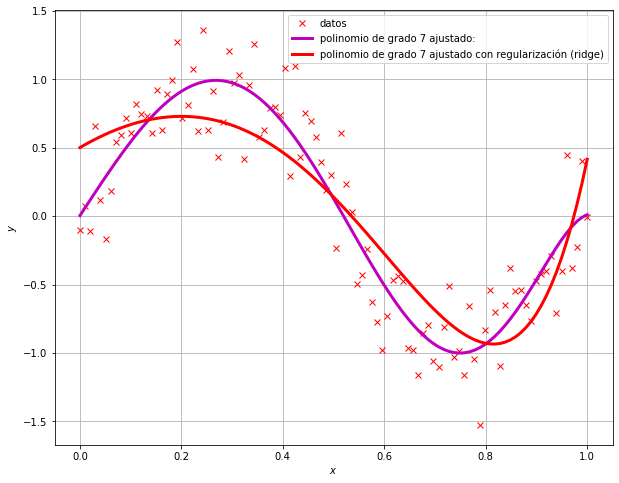

In [81]:
# Grafica de los puntos y la recta ajustada
# Graficar recta, parabola y polinomio cúbico ajustados
plt.figure(figsize=(10,8))
plt.plot(x,y,'xr',label='datos')

f_hat_7 = np.array([Beta_7[i]*x**i for i in range(8)]).sum(axis=0)
f_hat_7_ridge = np.array([Beta_7_ridge[i]*x**i for i in range(8)]).sum(axis=0)

plt.plot(x,f_hat_7,'m', lw=3, label=f'polinomio de grado 7 ajustado:')
plt.plot(x,f_hat_7_ridge,'r', lw=3, label=f'polinomio de grado 7 ajustado con regularización (ridge)')


plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

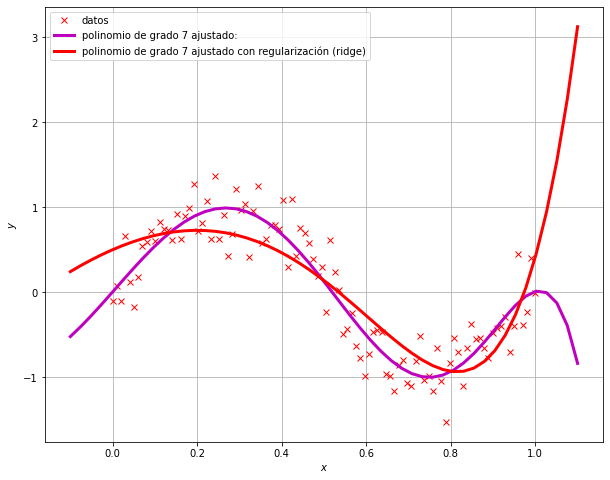

In [84]:
plt.figure(figsize=(10,8))
plt.plot(x,y,'xr',label='datos')

x_num = np.linspace(-0.1,1.1)
f_hat_7 = np.array([Beta_7[i]*x_num**i for i in range(8)]).sum(axis=0)
f_hat_7_ridge = np.array([Beta_7_ridge[i]*x_num**i for i in range(8)]).sum(axis=0)


plt.plot(x_num,f_hat_7,'m', lw=3, label=f'polinomio de grado 7 ajustado:')
plt.plot(x_num,f_hat_7_ridge,'r', lw=3, label=f'polinomio de grado 7 ajustado con regularización (ridge)')


plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### 3.2. Lasso

$$\boldsymbol{\beta}^{lasso} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|\boldsymbol{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.

In [93]:
def min_sq_N_lasso(beta, x_points, y_points, N, l):
    n=len(x_points)
    f_hat_N = np.array([beta[i]*x_points**i for i in range(N+1)]).sum(axis=0)
    return (1/(2*n))*((y_points - f_hat_N)**2).sum() + l*np.abs(beta).sum()

In [94]:
# 1.- utilizar el grado del polinomio 7
# 2.- encontrar la solucion con minimize
# 3.- guardar la solucion Beta_7_lasso=solucion.x (l=0.03)
# 4.- Graficar el ajuste de curvas con lasso, ridge, ajuste normal


In [95]:
N=3
beta_ini = np.zeros(N+1)

solucion = opt.minimize(fun=min_sq_N_lasso, x0=np.zeros(8), args=(x,y,7,0.0003))
solucion


      fun: 0.050635606501573165
 hess_inv: array([[ 1.94086303e+01, -2.38067383e+02,  7.33472525e+02,
        -5.19786131e-01, -2.68861715e+03,  2.94832073e+03,
        -2.76081992e+00, -7.76883531e+02],
       [-2.38067383e+02,  3.88772012e+03, -1.31400117e+04,
         1.02285372e+01,  5.20118441e+04, -5.83780117e+04,
         5.42947963e+01,  1.59369936e+04],
       [ 7.33472525e+02, -1.31400117e+04,  4.66211277e+04,
        -3.87854834e+01, -1.94789951e+05,  2.22326232e+05,
        -2.05772205e+02, -6.21248771e+04],
       [-5.19786131e-01,  1.02285372e+01, -3.87854834e+01,
         3.57047128e-02,  1.75872360e+02, -2.05844572e+02,
         1.89159797e-01,  5.94755095e+01],
       [-2.68861715e+03,  5.20118441e+04, -1.94789951e+05,
         1.75872360e+02,  8.69937984e+05, -1.01342329e+06,
         9.32498491e+02,  2.90965112e+05],
       [ 2.94832073e+03, -5.83780117e+04,  2.22326232e+05,
        -2.05844572e+02, -1.01342329e+06,  1.18800280e+06,
        -1.09122525e+03, -3.439662

In [96]:
Beta_7_lasso=solucion.x
Beta_7_lasso

array([ 3.75029805e-02,  7.33615373e+00, -1.56109369e+01, -1.12639157e-03,
        6.81483503e-02,  1.10204158e+01, -5.97217038e-03, -2.47580063e+00])

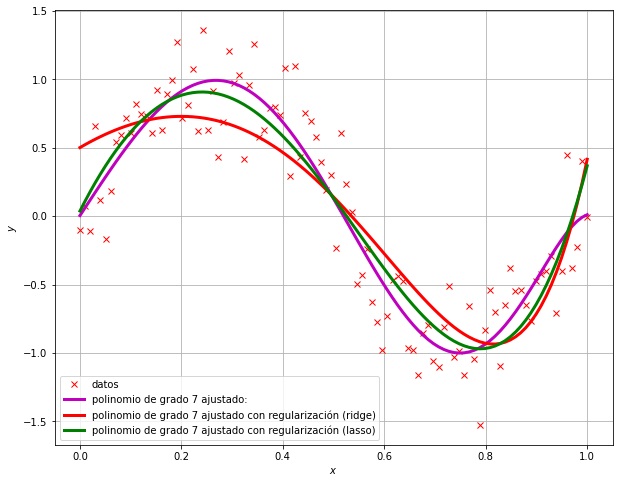

In [97]:
# Graficar recta, parabola y polinomio cúbico ajustados
plt.figure(figsize=(10,8))
plt.plot(x,y,'xr',label='datos')

f_hat_7 = np.array([Beta_7[i]*x**i for i in range(8)]).sum(axis=0)
f_hat_7_ridge = np.array([Beta_7_ridge[i]*x**i for i in range(8)]).sum(axis=0)
f_hat_7_lasso = np.array([Beta_7_lasso[i]*x**i for i in range(8)]).sum(axis=0)


plt.plot(x,f_hat_7,'m', lw=3, label=f'polinomio de grado 7 ajustado:')
plt.plot(x,f_hat_7_ridge,'r', lw=3, label=f'polinomio de grado 7 ajustado con regularización (ridge)')
plt.plot(x,f_hat_7_lasso,'g', lw=3, label=f'polinomio de grado 7 ajustado con regularización (lasso)')


plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

## 4. Ajuste robusto

Ahora, consideremos de nuevo el caso de la línea recta con un par de puntos atípicos al inicio y al final...

In [99]:
N=20
x=np.linspace(0,10,N)

y =10+2*x+np.random.normal(loc=0, scale=2, size=(N,))
y[0]=30
y[-1]=10

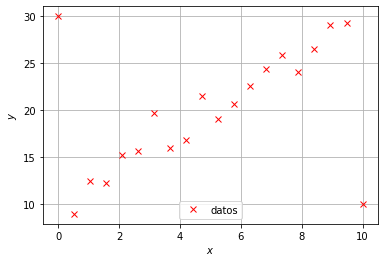

In [100]:
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr',label='datos')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

Solucionamos el problema normalmente...

In [101]:
# Función objetivo ajuste polinomio grado N
def min_sq_N(beta, x_points, y_points, N):
    n=len(x_points)
    f_hat_N = np.array([beta[i]*x_points**i for i in range(N+1)]).sum(axis=0)
    return (1/(2*n))*((y_points - f_hat_N)**2).sum()

In [103]:
solucion = opt.minimize(fun=min_sq_N, x0=np.zeros(2), args=(x,y,1))
solucion

      fun: 15.835303363402284
 hess_inv: array([[ 3.62227271, -0.52873065],
       [-0.52873065,  0.10640262]])
      jac: array([ 5.96046448e-06, -6.79492950e-06])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 7
     njev: 8
   status: 0
  success: True
        x: array([15.23003992,  0.95168526])

In [104]:
beta_1 = solucion.x
beta_1

array([15.23003992,  0.95168526])

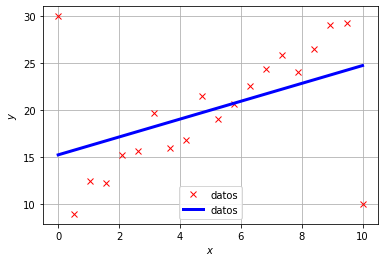

In [106]:
plt.figure(figsize=(6,4))
f_hat_1 = np.array([beta_1[i]*x**i for i in range(2)]).sum(axis=0)

plt.plot(x,y,'xr',label='datos')
plt.plot(x,f_hat_1,'b',lw=3,label='datos')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

Si estos puntos que parecen ser atípicos, hacen parte de una 'mala medición', vemos que el ajuste que obtenemos a los otros puntos es muy pobre...

**¿Cómo podemos evitar esto?** La respuesta es [*ajuste robusto*](https://en.wikipedia.org/wiki/Huber_loss).

In [107]:
def huber(a,d):
    if np.abs(a) <=d:
        return a**2
    else:
        return d*(2*np.abs(a)-d)

In [110]:
def min_sq_robusto_N(beta,x_points, y_points,N):
    n=len(x_points)
    f_hat_N = np.array([beta[i]*x_points**i for i in range(N+1)]).sum(axis=0)
    return (1/(2*n))*(np.vectorize(huber)(y_points - f_hat_N,5)).sum()

In [111]:
solucion = opt.minimize(fun=min_sq_robusto_N, x0=np.zeros(2), args=(x,y,1))
solucion

      fun: 9.300089960602191
 hess_inv: array([[ 4.83737049, -0.74557289],
       [-0.74557289,  0.14916066]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 44
      nit: 9
     njev: 11
   status: 0
  success: True
        x: array([11.5932309 ,  1.67878937])

In [112]:
beta_1_rob = solucion.x
beta_1_rob

array([11.5932309 ,  1.67878937])

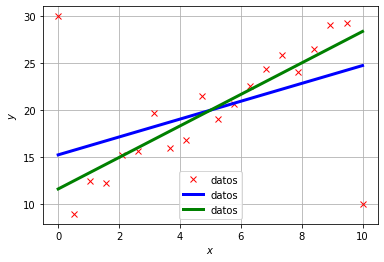

In [113]:
plt.figure(figsize=(6,4))
f_hat_1 = np.array([beta_1[i]*x**i for i in range(2)]).sum(axis=0)
f_hat_1_rob = np.array([beta_1_rob[i]*x**i for i in range(2)]).sum(axis=0)

plt.plot(x,y,'xr',label='datos')

plt.plot(x,f_hat_1,'b',lw=3,label='datos')
plt.plot(x,f_hat_1_rob,'g',lw=3,label='datos')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

Mejor...

## 5. Actividad

La siguiente celda lee datos correspondientes a tamaños $x$ ($ft^2$) y precios $y$ (USD) de casas en Portland, Oregon.

1. Graficar estos datos poniendo los precios en el eje $y$ y los tamaños en el eje $x$.
2. Ajustar polinomios de grado 1 hasta grado 5.
3. Graficar el error cuadrático acumulado contra el número de términos, y elegir un polinomio que ajuste bien y su grado sea el menor posible.
4. Supongamos que un amigo tuyo tiene una casa de $1250 ft^2$. Según tu modelo, ¿en cuánto podría vender dicha casa?


$$f_{hat} = \beta_0 +\beta_1*x $$
$$f_{hat} = \beta_0 +\beta_1*(1250) $$


In [114]:
import pandas as pd
data = pd.read_csv('housing_prices.csv')


In [115]:
type(data)

pandas.core.frame.DataFrame

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   size        47 non-null     int64
 1   n_bedrooms  47 non-null     int64
 2   price       47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [117]:
data.columns

Index(['size', 'n_bedrooms', 'price'], dtype='object')

In [119]:
data.head(10)

,size,n_bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [121]:
data['size']

0     2104
1     1600
2     2400
3     1416
4     3000
5     1985
6     1534
7     1427
8     1380
9     1494
10    1940
11    2000
12    1890
13    4478
14    1268
15    2300
16    1320
17    1236
18    2609
19    3031
20    1767
21    1888
22    1604
23    1962
24    3890
25    1100
26    1458
27    2526
28    2200
29    2637
30    1839
31    1000
32    2040
33    3137
34    1811
35    1437
36    1239
37    2132
38    4215
39    2162
40    1664
41    2238
42    2567
43    1200
44     852
45    1852
46    1203
Name: size, dtype: int64

In [122]:
data['price']

0     399900
1     329900
2     369000
3     232000
4     539900
5     299900
6     314900
7     198999
8     212000
9     242500
10    239999
11    347000
12    329999
13    699900
14    259900
15    449900
16    299900
17    199900
18    499998
19    599000
20    252900
21    255000
22    242900
23    259900
24    573900
25    249900
26    464500
27    469000
28    475000
29    299900
30    349900
31    169900
32    314900
33    579900
34    285900
35    249900
36    229900
37    345000
38    549000
39    287000
40    368500
41    329900
42    314000
43    299000
44    179900
45    299900
46    239500
Name: price, dtype: int64

In [120]:
data.values

array([[  2104,      3, 399900],
       [  1600,      3, 329900],
       [  2400,      3, 369000],
       [  1416,      2, 232000],
       [  3000,      4, 539900],
       [  1985,      4, 299900],
       [  1534,      3, 314900],
       [  1427,      3, 198999],
       [  1380,      3, 212000],
       [  1494,      3, 242500],
       [  1940,      4, 239999],
       [  2000,      3, 347000],
       [  1890,      3, 329999],
       [  4478,      5, 699900],
       [  1268,      3, 259900],
       [  2300,      4, 449900],
       [  1320,      2, 299900],
       [  1236,      3, 199900],
       [  2609,      4, 499998],
       [  3031,      4, 599000],
       [  1767,      3, 252900],
       [  1888,      2, 255000],
       [  1604,      3, 242900],
       [  1962,      4, 259900],
       [  3890,      3, 573900],
       [  1100,      3, 249900],
       [  1458,      3, 464500],
       [  2526,      3, 469000],
       [  2200,      3, 475000],
       [  2637,      3, 299900],
       [  

In [123]:
x=data['size'].values

In [124]:
y=data['price'].values

In [125]:
x

array([2104, 1600, 2400, 1416, 3000, 1985, 1534, 1427, 1380, 1494, 1940,
       2000, 1890, 4478, 1268, 2300, 1320, 1236, 2609, 3031, 1767, 1888,
       1604, 1962, 3890, 1100, 1458, 2526, 2200, 2637, 1839, 1000, 2040,
       3137, 1811, 1437, 1239, 2132, 4215, 2162, 1664, 2238, 2567, 1200,
        852, 1852, 1203], dtype=int64)

In [126]:
y

array([399900, 329900, 369000, 232000, 539900, 299900, 314900, 198999,
       212000, 242500, 239999, 347000, 329999, 699900, 259900, 449900,
       299900, 199900, 499998, 599000, 252900, 255000, 242900, 259900,
       573900, 249900, 464500, 469000, 475000, 299900, 349900, 169900,
       314900, 579900, 285900, 249900, 229900, 345000, 549000, 287000,
       368500, 329900, 314000, 299000, 179900, 299900, 239500],
      dtype=int64)

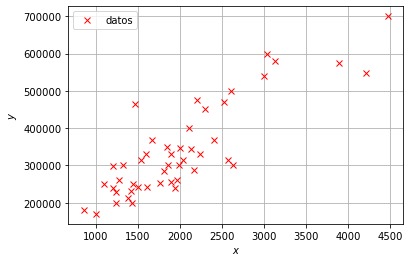

In [127]:
plt.figure(figsize=(6,4))
plt.plot(x,y,'xr',label='datos')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

In [129]:
#Ajuste de polinomios
# Función objetivo ajuste polinomio grado N
def min_sq_N(beta, x_points, y_points, N):
    n=len(x_points)
    f_hat_N = np.array([beta[i]*x_points**i for i in range(N+1)]).sum(axis=0)
    return (1/(2*n))*((y_points - f_hat_N)**2).sum()

In [130]:
#Ajuste de una recta
sol_poli_1 = opt.minimize(fun=min_sq_N, x0=np.zeros(2), args=(x,y,1))
sol_poli_1

      fun: 2058134064.9922478
 hess_inv: array([[ 3.29456008e+01, -1.42648017e-02],
       [-1.42648017e-02,  6.38930476e-06]])
      jac: array([   0., 1568.])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 175
      nit: 8
     njev: 41
   status: 2
  success: False
        x: array([71129.77955991,   134.58654786])

In [131]:
beta_poli_1=sol_poli_1.x
beta_poli_1

array([71129.77955991,   134.58654786])

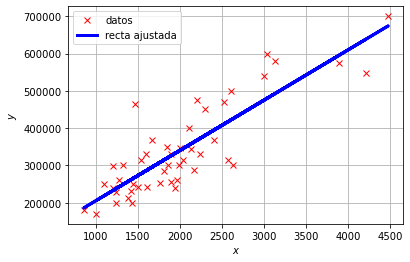

In [132]:
plt.figure(figsize=(6,4))

f_hat_1 = np.array([beta_poli_1[i]*x**i for i in range(2)]).sum(axis=0)
plt.plot(x,y,'xr',label='datos')
plt.plot(x,f_hat_1,'b',lw=3,label='recta ajustada')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### 4
$$f_{hat} = \beta_0 +\beta_1*x $$
$$f_{hat} = \beta_0 +\beta_1*(1250) $$

$$\beta_0=71129.77955991,   \beta_1=134.58654786$$

# Avisos:

## Proyecto:
### 1. Elegir integrantes para proyecto. Mínimo 2, máximo 3 (sin excepción). Algún integrante del equipo me deberá mandar un mensaje por MSTeams con los nombres de los integrantes.
### 2. Deben elegir un tema para proyecto que se pueda resolver como un problema de optimización (preferiblemente, relacionado con su carrera). 
### 3. Tendrán que mandarme un mensaje con su tema de proyecto. Juntos, definiremos el alcance.
### 4. Fecha de entrega y presentación: por lunes 20 de Junio del 2022